# Setup

In [1]:
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Installing the yolov5 setup
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import os
import utils
from PIL import Image
display = utils.notebook_init()  # checks

YOLOv5 🚀 2023-5-17 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (4 CPUs, 25.5 GB RAM, 23.5/166.8 GB disk)


# Predict
*Reference:* Ultralytics. (2021). YOLOv5 Issue #36: YOLOv5 on new datasets. Retrieved from https://github.com/ultralytics/yolov5/issues/36

In [7]:
# Navigate to directory that contains 'yolov5'
os.chdir('/content/')
os.getcwd()

'/content'

In [8]:
# Load custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/CRP_Shared_Folder/Results/Scenario_14/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-17 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [9]:
# Inference Settings
model.conf = 0.1  # confidence threshold
model.iou = 0.2  # IoU threshold

image 1/4: 452x612 1 HandGun
image 2/4: 861x861 1 Shuriken
image 3/4: 1712x2136 1 RazorBlade
image 4/4: 2208x2688 1 Knife
Speed: 57.8ms pre-process, 15.0ms inference, 12.6ms NMS per image at shape (4, 3, 416, 416)


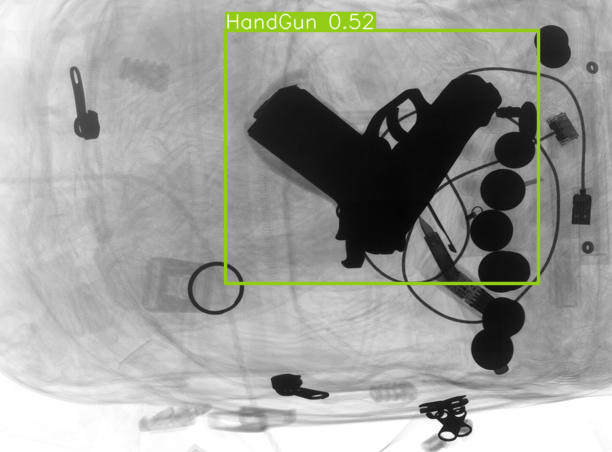

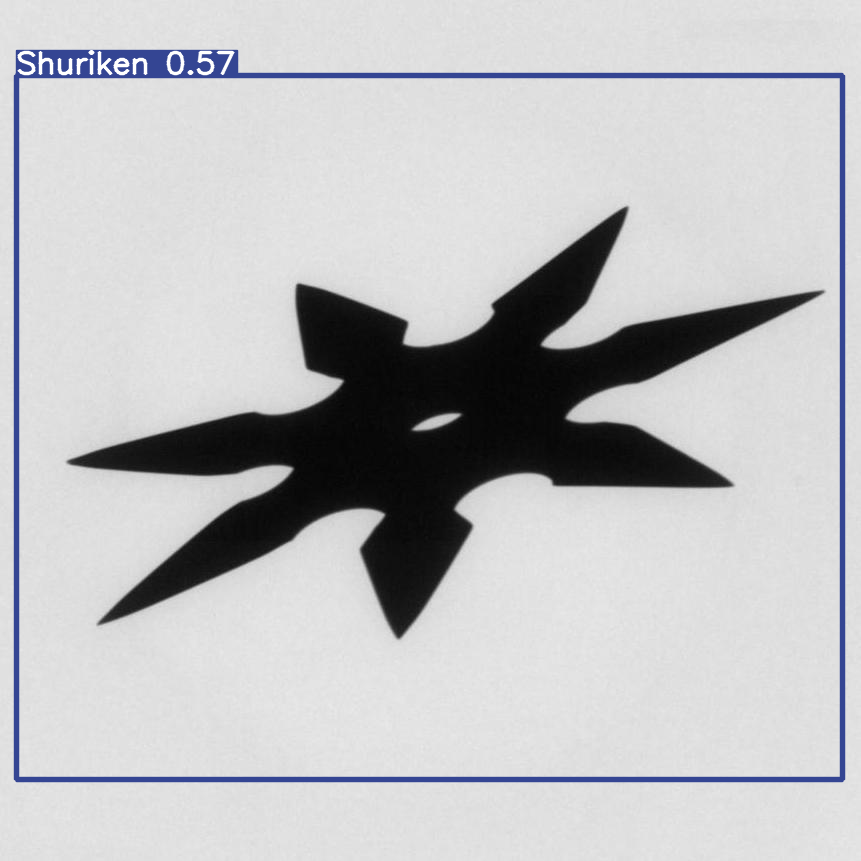

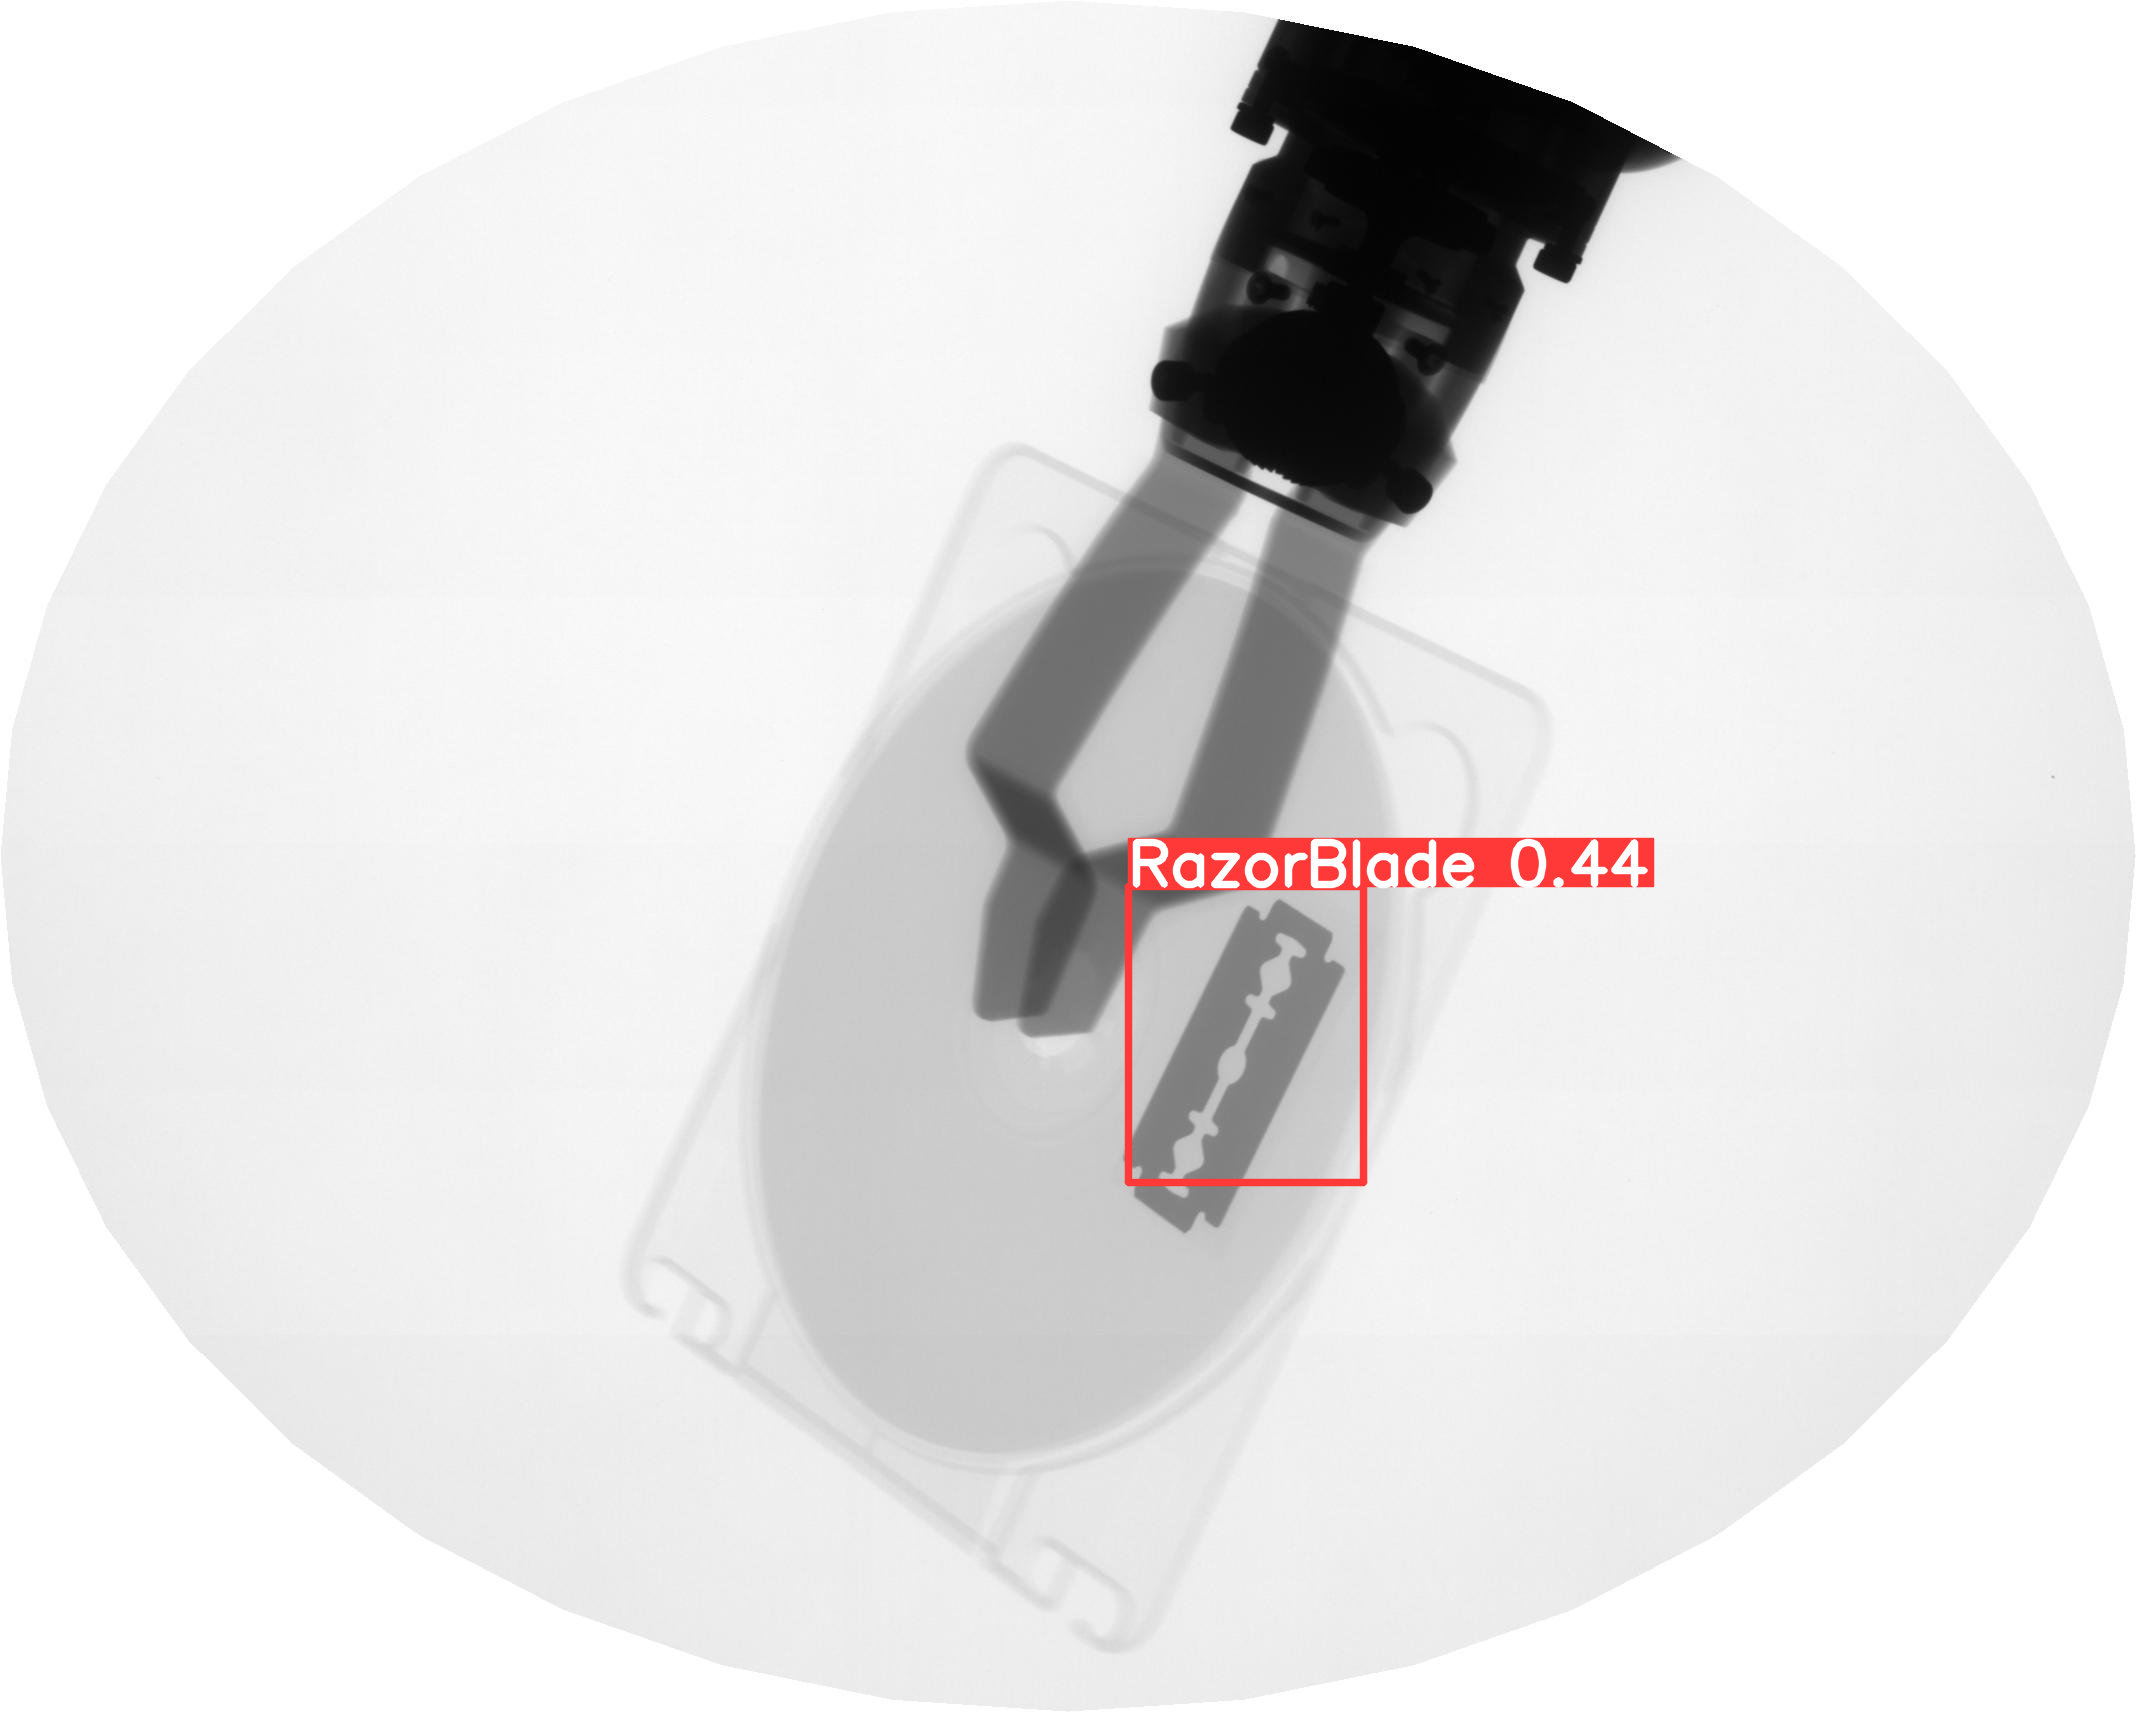

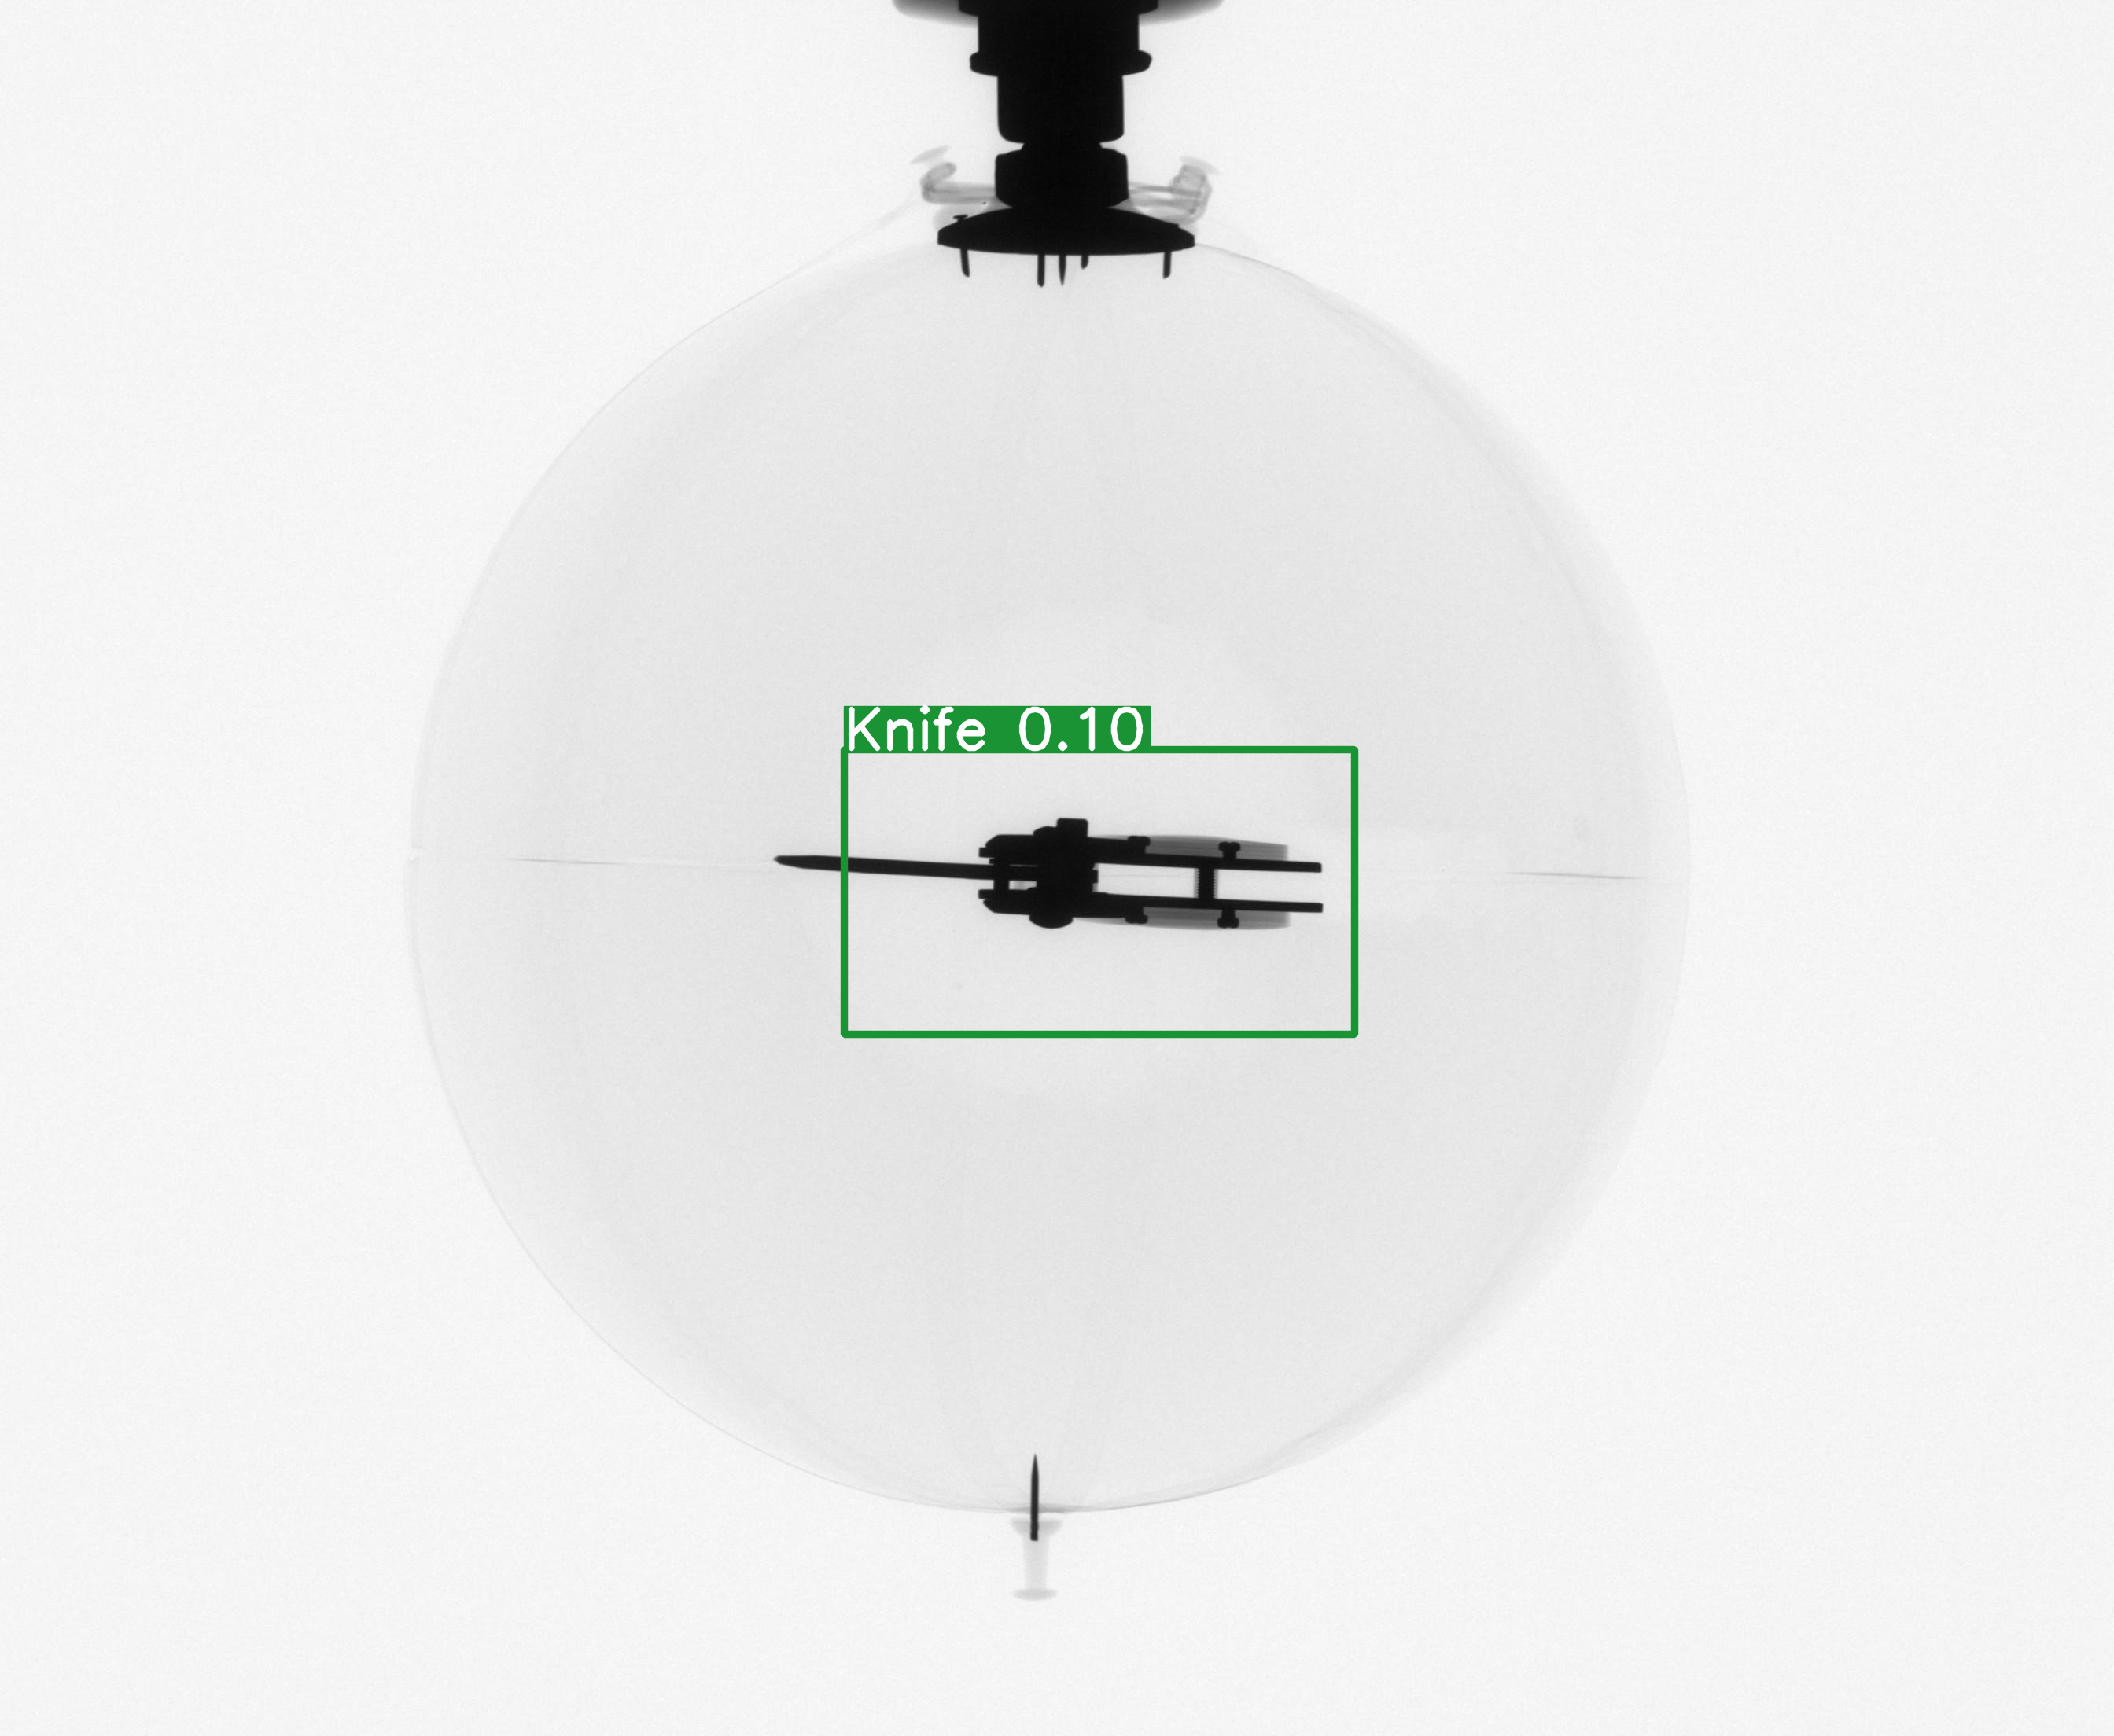

In [10]:
# Set the path for test images and create a list of test image names
test_img_path = '/content/drive/MyDrive/CRP_Shared_Folder/CRP__Dataset_Repartition/valid/images/'
test_img = ['B0022_0002', 'B0050_0077', 'B0063_0002', 'B0075_0039']
# Create an empty list to store test images
open_img = []
# Loop through the test_img, open each image and append it to open_img
for img in test_img:
  open_img.append(Image.open(test_img_path+img+'.png'))
# Use the model to predict the classes and bounding boxes for the test images in pred_list, with a size of 416 pixels given the model is trained on images of size 416 pixels
results = model(open_img,size = 416)
# Print the predicted classes and bounding boxes for each image in results
results.print()
# Display the predicted bounding boxes on each image in results
results.show()